Slide 1: The title slide


<center> <h3>Kaggle AMS 2013-2014 Solar Energy Prediction Contest</h3>
<h4>General Assembly Data Science Course Project Washington, DC (11/30/15 - 02/22/16) </h4>
<h4> Joel Piper </h4> </center>

<img src=images/gefs_mesonet_stations.png width="800"> </img>

Slide 2: Background

### Overview of Competition:

* Electric utility companies need accurate forecasts of energy production to balance renewables and fossil fuels
* Errors in the forecast could lead to large expenses for the utility
* The goal of the contest is to discover which statistical and machine learning techniques provide the best short term predictions of solar energy production 
* Contestants will predict the total daily incoming solar energy at 98 Oklahoma Mesonet sites, which will serve as "solar farms" for the contest 
* Input numerical weather prediction data for the contest comes from the NOAA/ESRL Global Ensemble Forecast System (GEFS) Reforecast Version 2

#### Outputs

* Total energy for each of 5113 days at 98 stations

#### Inputs

* Measurements over same 5113 days (1796 days for test set)
* 15 weather-related variables
* 11 "different" models 
* 5 measurements each day
* 9x14 latitude/longitude grid of estimates (not co-located with stations!)

** Given Data: **

<table style="width: 900px;" border="0" align="center">
<tbody>
<tr>
<td>Variable</td>
<td>Description</td>
<td>Units</td>
</tr>
<tr>
<td>apcp_sfc</td>
<td>3-Hour accumulated precipitation at the surface</td>
<td>kg m-2</td>
</tr>
<tr>
<td>dlwrf_sfc</td>
<td>Downward long-wave radiative flux average at the surface</td>
<td>W m-2</td>
</tr>
<tr>
<td>dswrf_sfc</td>
<td>Downward short-wave radiative flux average at the surface</td>
<td>W m-2</td>
</tr>
<tr>
<td>pres_msl</td>
<td>Air pressure at mean sea level</td>
<td>Pa</td>
</tr>
<tr>
<td>pwat_eatm</td>
<td>Precipitable Water over the entire depth of the atmosphere</td>
<td>kg m-2</td>
</tr>
<tr>
<td>spfh_2m</td>
<td>Specific Humidity at 2 m above ground</td>
<td>kg kg-1</td>
</tr>
<tr>
<td>tcdc_eatm</td>
<td>Total cloud cover over the entire depth of the atmosphere</td>
<td>&nbsp;%</td>
</tr>
<tr>
<td>tcolc_eatm</td>
<td>Total column-integrated condensate over the entire atmos.</td>
<td>kg m-2</td>
</tr>
<tr>
<td>tmax_2m</td>
<td>&nbsp;Maximum Temperature over the past 3 hours at 2 m above the ground</td>
<td>&nbsp;K</td>
</tr>
<tr>
<td>tmin_2m</td>
<td>&nbsp;Mininmum Temperature over the past 3 hours at 2 m above the ground</td>
<td>&nbsp;K</td>
</tr>
<tr>
<td>tmp_2m</td>
<td>&nbsp;Current temperature at 2 m above the ground</td>
<td>&nbsp;K</td>
</tr>
<tr>
<td>tmp_sfc</td>
<td>&nbsp;Temperature of the surface</td>
<td>&nbsp;K</td>
</tr>
<tr>
<td>ulwrf_sfc</td>
<td>&nbsp;Upward long-wave radiation at the surface</td>
<td>&nbsp;W m-2</td>
</tr>
<tr>
<td>ulwrf_tatm</td>
<td>&nbsp;Upward long-wave radiation at the top of the atmosphere</td>
<td>&nbsp;W m-2</td>
</tr>
<tr>
<td>uswrf_sfc</td>
<td>&nbsp;Upward short-wave radiation at the surface</td>
<td>&nbsp;W m-2</td>
</tr>
</tbody>
</table>

### A small subset of the total solar data (y_train)

In [6]:
import pandas as pd
import netCDF4 as nc
import numpy as np
train_data = pd.read_csv('../../solar/data/kaggle_solar/train.csv', index_col='Date', parse_dates=['Date'])
train_data.head(5).iloc[:,0:13]

,ACME,ADAX,ALTU,APAC,ARNE,BEAV,BESS,BIXB,BLAC,BOIS,BOWL,BREC,BRIS
Date,,,,,,,,,,,,,
1994-01-01,12384900,11930700,12116700,12301200,10706100,10116900,11487900,11182800,10848300,10225200,11374200,10335300,11119200
1994-01-02,11908500,9778500,10862700,11666400,8062500,9262800,9235200,3963300,3318300,11316600,8318700,4711500,5530500
1994-01-03,12470700,9771900,12627300,12782700,11618400,10789800,11895900,4512600,5266500,11916000,8594700,7239600,5596200
1994-01-04,12725400,6466800,13065300,12817500,12134400,11816700,12186600,3212700,8270100,11884200,5754900,8842500,4360500
1994-01-05,10894800,11545200,8060400,10379400,6918600,9936300,6411300,9566100,8009400,9288900,10971000,8810100,10572300


### A small subset of the input weather data (X_train)

In [7]:
dswrf = nc.Dataset('../../solar/data/kaggle_solar/train/dswrf_sfc_latlon_subset_19940101_20071231.nc','r+').variables.values()[-1]
subset = dswrf[0:3,2:4,2:5,2:4,2:4]
nc_var = pd.DataFrame(np.reshape(subset,(np.shape(subset)[0], np.product(np.shape(subset)[1:]))))
nc_var

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,200,210,190,200,580,570,560,540,410,400,...,190,200,580,580,570,570,420,410,400,400
1,210,210,200,200,600,600,580,580,430,420,...,200,200,600,600,580,580,430,420,420,410
2,200,210,190,200,590,590,570,570,420,420,...,190,200,580,580,570,570,420,410,410,400


### A small subset of the input weather data (X_train), cont.

In [122]:
oneD = pd.DataFrame(np.ravel(nc_var.values), columns=['Radiative Flux (J/m^2)'])
#print oneD
from solar.wrangle.engineer import Engineer
created_ind = Engineer.create_index(train_dates=['1994-01-01', '1994-01-03'], models=range(2,4), times=[18,21, 24], lats=range(36,38), 
                                    lons=range(256,258))[['train_dates', 'models', 'times', 'lats', 'lons']]
created_ind = created_ind.sort_values(by=['train_dates', 'models', 'times', 'lats', 'lons'])
var_data_frame = pd.DataFrame(np.hstack((created_ind.values,oneD.values)))

var_data_frame.columns = ['train_dates', 'models', 'times', 'lats', 'lons', 'dwsrf_sfc']
var_data_frame
var_data_frame.set_index(['train_dates', 'models', 'times', 'lats', 'lons'], inplace=True)
dswrf_with_index = var_data_frame.sort_index()

In [123]:
dswrf_with_index

dwsrf_sfc
train_dates models times lats lons          
1994-01-01  2      18    36   256        200
                              257        210
                         37   256        190
                              257        200
                   21    36   256        580
                              257        570
                         37   256        560
                              257        540
                   24    36   256        410
                              257        400
                         37   256        400
                              257        390
            3      18    36   256        200
                              257        210
                         37   256        190
                              257        200
                   21    36   256        580
                              257        580
                         37   256        570
                              257        570
                   24    36   256        420
                              257        410
                         37   256        400
                              257        400
1994-01-02  2      18    36   256        210
                              257        210
                         37   256        200
                              257        200
                   21    36   256        600
                              257        600
...                                      ...
            3      21    37   256        580
                              257        580
                   24    36   256        430
                              257        420
                         37   256        420
                              257        410
1994-01-03  2      18    36   256        200
                              257        210
                         37   256        190
                              257        200
                   21    36   256        590
                              257        590
                         37   256        570
                              257        570
                   24    36   256        420
                              257        420
                         37   256        410
                              257        400
            3      18    36   256        200
                              257        210
                         37   256        190
                              257        200
                   21    36   256        580
                              257        580
                         37   256        570
                              257        570
                   24    36   256        420
                              257        410
                         37   256        410
                              257        400

[72 rows x 1 columns]

In [9]:
from mpl_toolkits.basemap import Basemap, cm
import matplotlib.pyplot as plt
%matplotlib inline

def basic_oklahoma_map(ax=None, lllat=34, urlat=42,
                   lllon=-45, urlon=-75):
    m = Basemap(ax=ax, projection='stere', lon_0=(urlon + lllon)/2,
               lat_0=(urlat + lllat) / 2, llcrnrlat = lllat, urcrnrlat=urlat,
               llcrnrlon=lllon, urcrnrlon=urlon,
               resolution='f')
    m.drawcoastlines()
    m.drawstates()
    m.drawcountries()
    return m

/Users/Joel/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


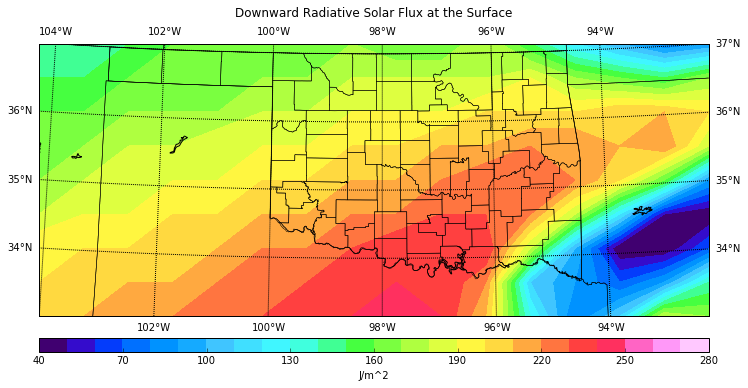

In [10]:
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

lllat=33; urlat=37; lllon=-104; urlon=-92
ax = axes
m = basic_oklahoma_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
parallels = np.arange(30.,40,1.)
m.drawparallels(parallels,labels=[1,1,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-104.,-92.,2.)
m.drawmeridians(meridians,labels=[0,0,1,1],fontsize=10)
data = dswrf[0,0,2,:,:]
data.shape
# draw meridians
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.

x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = range(40,290,10)
cs = m.contourf(x,y,data,clevs,cmap=cm.GMT_wysiwyg)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="8%")
cbar.set_label('J/m^2')

m.readshapefile('/Users/Joel/Downloads/COUNTY/COUNTY','county_data')
# add title
plt.title("Downward Radiative Solar Flux at the Surface", y=1.08)

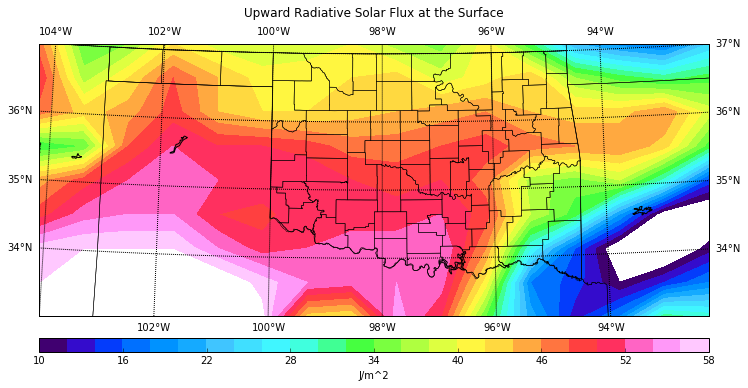

In [11]:
%matplotlib inline
uswrf = nc.Dataset('../../solar/data/kaggle_solar/train/uswrf_sfc_latlon_subset_19940101_20071231.nc','r+').variables.values()[-1]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

lllat=33; urlat=37; lllon=-104; urlon=-92
ax = axes
m = basic_oklahoma_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
parallels = np.arange(30.,40,1.)
m.drawparallels(parallels,labels=[1,1,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-104.,-92.,2.)
m.drawmeridians(meridians,labels=[0,0,1,1],fontsize=10)
data = uswrf[0,0,2,:,:]
data.shape
# draw meridians
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.

x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = range(10,60,2)
cs = m.contourf(x,y,data,clevs,cmap=cm.GMT_wysiwyg)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="8%")
cbar.set_label('J/m^2')
# add title
plt.title("Upward Radiative Solar Flux at the Surface", y=1.08)
m.readshapefile('/Users/Joel/Downloads/COUNTY/COUNTY','county_data')
plt.show()

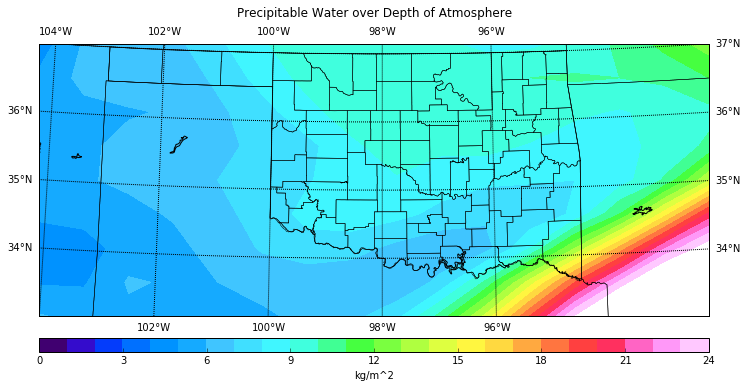

In [12]:
%matplotlib inline
pwat = nc.Dataset('../../solar/data/kaggle_solar/train/pwat_eatm_latlon_subset_19940101_20071231.nc','r+').variables.values()[-1]
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

lllat=33; urlat=37; lllon=-104; urlon=-92
ax = axes
m = basic_oklahoma_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
parallels = np.arange(30.,40,1.)
m.drawparallels(parallels,labels=[1,1,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-104.,-94.,2.)
m.drawmeridians(meridians,labels=[0,0,1,1],fontsize=10)
data = pwat[0,0,2,:,:]
data.shape
# draw meridians
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.

x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
clevs = range(0,25,1)
cs = m.contourf(x,y,data,clevs,cmap=cm.GMT_wysiwyg)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="8%")
cbar.set_label('kg/m^2')
# add title
plt.title("Precipitable Water over Depth of Atmosphere", y=1.08)
m.readshapefile('/Users/Joel/Downloads/COUNTY/COUNTY','county_data')
plt.show()

## Exploration of the input weather variables

  <img src=images/dsrf_sfc.png width="800"> </img>

<img src=images/usrf_sfc.png width="800"> </img>

<img src=images/pwat.png width="900"> </img>

In [13]:
#pd.DataFrame(train_data.loc['1994-01-01'], columns=['energy'])
one_day = pd.DataFrame(train_data.loc['1994-01-01'])
one_day.columns = ['energy']
one_day.index.name = 'station'

stat_info = pd.read_csv('../../solar/data/kaggle_solar/station_info.csv')
results = pd.merge(one_day, stat_info[['stid', 'nlat','elon']], how='inner', left_index=True, right_on='stid')[['nlat', 'elon', 'energy']]
#results['energy']

In [14]:
#pd.DataFrame(train_data.loc['1994-01-01'], columns=['energy'])
two_day = pd.DataFrame(train_data.loc['2007-07-25'])
two_day.columns = ['energy']
two_day.index.name = 'station'

stat_info = pd.read_csv('../../solar/data/kaggle_solar/station_info.csv')
results2 = pd.merge(two_day, stat_info[['stid', 'nlat','elon']], how='inner', left_index=True, right_on='stid')[['nlat', 'elon', 'energy']]
results2['energy']
np.min(results2['energy'])/1000000

9

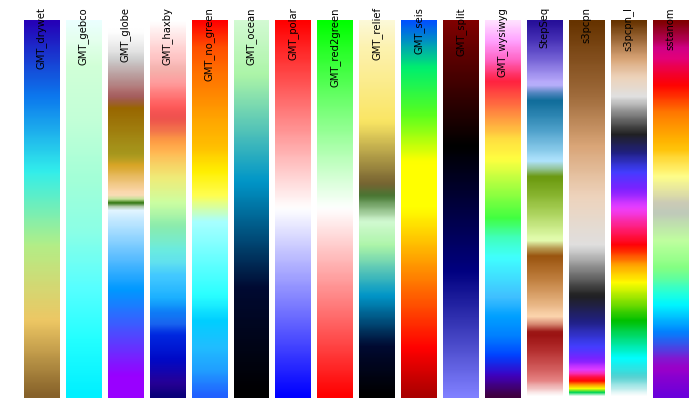

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import cm
a=np.outer(np.arange(0,1,0.01),np.ones(10))
plt.figure(figsize=(10,7))
plt.subplots_adjust(top=0.8,bottom=0.05,left=0.01,right=0.99)
maps=[m for m in cm.datad.keys() if not m.endswith("_r")]
maps.sort()
l=len(maps)+1
i=1
for m in maps:
    plt.subplot(1,l,i)
    plt.axis("off")
    plt.imshow(a,aspect='auto',cmap=cm.__dict__[m],origin="lower")
    plt.title(m,rotation=90,fontsize=10)
    i=i+1
plt.show()

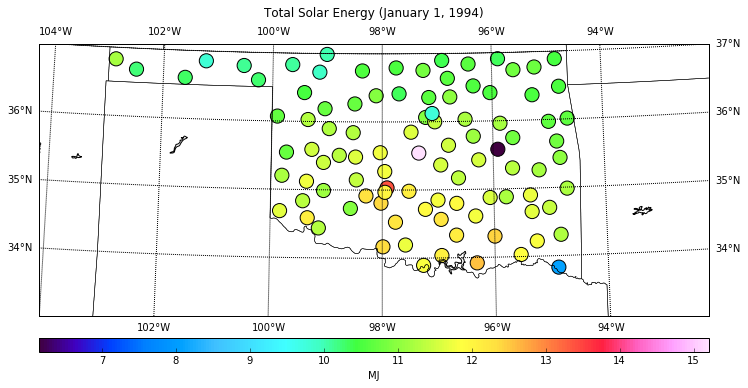

In [16]:
from mpl_toolkits.basemap import Basemap, cm
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

lllat=33; urlat=37; lllon=-104; urlon=-92
ax = axes
m = basic_oklahoma_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
parallels = np.arange(30.,40,1.)
m.drawparallels(parallels,labels=[1,1,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-104.,-92.,2.)
m.drawmeridians(meridians,labels=[0,0,1,1],fontsize=10)
data = (results['energy']/1000000.0).values
lons = results['elon']
lats = results['nlat']
x, y = m(lons.values, lats.values)

cs = m.scatter(x,y, s=200, c=data, cmap=cm.GMT_wysiwyg)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="8%")
cbar.set_label('MJ')
# add title
plt.title("Total Solar Energy (January 1, 1994)", y=1.08)
plt.show()

## Exploration of the Output (Total Solar Energy)

<img src=images/total_solar.png width="900"> </img>

<img src=images/total_solar2.png width="900"> </img>

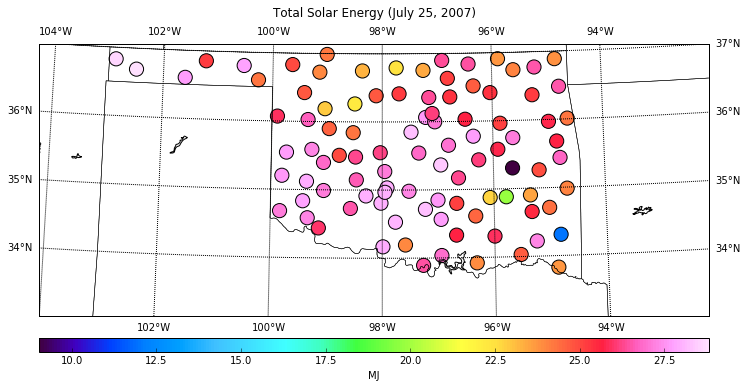

In [17]:
from mpl_toolkits.basemap import Basemap, cm
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

lllat=33; urlat=37; lllon=-104; urlon=-92
ax = axes
m = basic_oklahoma_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
parallels = np.arange(30.,40,1.)
m.drawparallels(parallels,labels=[1,1,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-104.,-92.,2.)
m.drawmeridians(meridians,labels=[0,0,1,1],fontsize=10)
data = (results2['energy']/1000000.0).values
lons = results2['elon']
lats = results2['nlat']
x, y = m(lons.values, lats.values)

cs = m.scatter(x,y, s=200, c=data, cmap=cm.GMT_wysiwyg)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="8%")
cbar.set_label('MJ')
# add title
plt.title("Total Solar Energy (July 25, 2007)", y=1.08)
plt.show()

## Feature Engineering

In [94]:
Xtrain_dir = 'solar/data/kaggle_solar/train/'
Xtest_dir = 'solar/data/kaggle_solar/test'
ytrain_file = 'solar/data/kaggle_solar/train.csv'
station_file = 'solar/data/kaggle_solar/station_info.csv'
import solar.wrangle.wrangle
import solar.wrangle.subset
import solar.wrangle.engineer
import solar.analyze.model
import solar.report.submission
import numpy as np
from solar.wrangle.wrangle import SolarData

station = ['ACME', 'BEAV']

train_dates = ['1994-01-01','1994-03-01']

test_dates = ['2008-01-01', '2008-01-05']


station_layout = True

var = ['dswrf_sfc', 'uswrf_sfc', 'tcolc_eatm', 'spfh_2m']

# Keep model 0 (the default model) as a column for each of the variables (aggregated over other dimensions)
model = [0, 1]

# Aggregate over all times
#times = [12, 15, 18, 21, 24]
times = [21, 24]

default_grid = {'type':'relative', 'axes':{'var':var, 'models':model, 'times':times,
                                          'station':station}}
just_grid = [default_grid]



%prun input_data = SolarData.load(Xtrain_dir, ytrain_file, Xtest_dir, station_file, \
                                  train_dates, test_dates, station, \
                                  station_layout, just_grid, 'local')

INFO:solar.wrangle.wrangle:Started building test and training data
INFO:solar.wrangle.wrangle:Features: [{'axes': {'var': ['dswrf_sfc', 'uswrf_sfc', 'tcolc_eatm', 'spfh_2m'], 'models': [0, 1], 'station': ['ACME', 'BEAV'], 'times': [21, 24]}, 'type': 'relative'}]
INFO:solar.wrangle.wrangle:Train dates: ['1994-01-01', '1994-03-01']
INFO:solar.wrangle.wrangle:Test dates: ['2008-01-01', '2008-01-05']
INFO:solar.wrangle.wrangle:Stations: ['ACME', 'BEAV']
INFO:solar.wrangle.wrangle:Finished building test and training data


In [106]:
input_data[0].iloc[0:10,range(0,7)+range(47,51)]

values                                             \
models                      0                                              
var                 dswrf_sfc uswrf_sfc tcolc_eatm     spfh_2m dswrf_sfc   
lat_longs                1_SE      1_SE       1_SE        1_SE      2_SW   
times                      21        21         21          21        21   
train_dates station                                                        
1994-01-01  ACME          540       115     0.0014     0.00352       530   
            BEAV          520       122     0.0009     0.00232       510   
1994-01-02  ACME          530       112     0.0116     0.00376       500   
            BEAV          510       122     0.0037     0.00242       460   
1994-01-03  ACME          550       118     0.0002  0.00288237       550   
            BEAV          520       124     0.0003  0.00229237       520   
1994-01-04  ACME          560       120          0     0.00269       550   
            BEAV          530       127     0.0021     0.00167       530   
1994-01-05  ACME          540       115     0.0327     0.00334       540   
            BEAV          430        94      0.071     0.00171       460   

                                                                         \
models                                            1                       
var                 uswrf_sfc tcolc_eatm    spfh_2m dswrf_sfc uswrf_sfc   
lat_longs                2_SW       2_SW       4_NW      1_SE      1_SE   
times                      21         21         21        24        24   
train_dates station                                                       
1994-01-01  ACME          110          0    0.00367       360        81   
            BEAV          118     0.0014    0.00307       350        84   
1994-01-02  ACME          100       0.01    0.00443       350        78   
            BEAV          102     0.0013    0.00256       350        87   
1994-01-03  ACME          114      0.003    0.00261       370        83   
            BEAV          119      0.004    0.00252       350        87   
1994-01-04  ACME          114     0.0003  0.0026683       370        85   
            BEAV          123     0.0043  0.0021783       360        91   
1994-01-05  ACME          112     0.0094    0.00374       340        72   
            BEAV           99     0.1407    0.00267       300        69   

                                
models                          
var                 tcolc_eatm  
lat_longs                 1_SE  
times                       24  
train_dates station             
1994-01-01  ACME        0.0259  
            BEAV        0.0056  
1994-01-02  ACME        0.0006  
            BEAV        0.0015  
1994-01-03  ACME             0  
            BEAV             0  
1994-01-04  ACME        0.0001  
            BEAV        0.0022  
1994-01-05  ACME        0.0323  
            BEAV        0.0038

In [30]:
import cPickle as pickle
my_input = pickle.load(open('../../solar/data/kaggle_solar/inputs/input_2016-02-21-09-27-29.p','rb'))
subset = my_input[0].iloc[:,124:139]
subset.columns = ['dswrf_sfc', 'dlwrf_sfc', 'uswrf_sfc', 'ulwrf_sfc',
                'ulwrf_tatm', 'pwat_eatm', 'tcdc_eatm', 'apcp_sfc', 'pres_msl',
                'spfh_2m', 'tcolc_eatm', 'tmax_2m', 'tmin_2m', 'tmp_2m',
                'tmp_sfc']
combined = pd.merge(subset, yvals, left_on=['train_dates', 'station'], right_on=['date', 'location'])
corr_data = combined.drop(['level_0', 'index', 'date', 'location'], axis=1).set_index(['train_dates', 'station'])
corr_data = corr_data.astype(float)

In [113]:
my_input[0].iloc[90:110,0:4]

(frac_dist, lat_dist)  (frac_dist, long_dist)  \
train_dates station                                                  
2000-01-01  WATO                   0.84185                 0.47385   
            WAUR                   0.16775                 0.01185   
            WEAT                   0.50830                 0.22491   
            WEST                   0.01100                 0.35504   
            WILB                   0.90092                 0.65195   
            WIST                   0.98426                 0.31222   
            WOOD                   0.42329                 0.58318   
            WYNO                   0.51806                 0.65778   
2000-01-02  ACME                   0.80833                 0.97675   
            ADAX                   0.79851                 0.33091   
            ALTU                   0.58722                 0.66192   
            APAC                   0.91418                 0.70784   
            ARNE                   0.07204                 0.09692   
            BEAV                   0.80253                 0.46988   
            BESS                   0.40185                 0.94153   
            BIXB                   0.96305                 0.13379   
            BLAC                   0.75443                 0.74548   
            BOIS                   0.69256                 0.50287   
            BOWL                   0.17156                 0.36879   
            BREC                   0.41201                 0.30606   

                     (days_from_coldest, from_coldest)  \
train_dates station                                      
2000-01-01  WATO                                     3   
            WAUR                                     3   
            WEAT                                     3   
            WEST                                     3   
            WILB                                     3   
            WIST                                     3   
            WOOD                                     3   
            WYNO                                     3   
2000-01-02  ACME                                     2   
            ADAX                                     2   
            ALTU                                     2   
            APAC                                     2   
            ARNE                                     2   
            BEAV                                     2   
            BESS                                     2   
            BIXB                                     2   
            BLAC                                     2   
            BOIS                                     2   
            BOWL                                     2   
            BREC                                     2   

                     (days_from_solstice, from_solstice)  
train_dates station                                       
2000-01-01  WATO                                      11  
            WAUR                                      11  
            WEAT                                      11  
            WEST                                      11  
            WILB                                      11  
            WIST                                      11  
            WOOD                                      11  
            WYNO                                      11  
2000-01-02  ACME                                      12  
            ADAX                                      12  
            ALTU                                      12  
            APAC                                      12  
            ARNE                                      12  
            BEAV                                      12  
            BESS                                      12  
            BIXB                                      12  
            BLAC                                      12  
            BOIS                                      12  
            BOWL       

In [209]:
my_input[0].iloc[0:10,604:613]

stat_ACME  stat_ADAX  stat_ALTU  stat_APAC  stat_ARNE  \
train_dates station                                                          
2000-01-01  ACME             1          0          0          0          0   
            ADAX             0          1          0          0          0   
            ALTU             0          0          1          0          0   
            APAC             0          0          0          1          0   
            ARNE             0          0          0          0          1   
            BEAV             0          0          0          0          0   
            BESS             0          0          0          0          0   
            BIXB             0          0          0          0          0   
            BLAC             0          0          0          0          0   
            BOIS             0          0          0          0          0   

                     stat_BEAV  stat_BESS  stat_BIXB  stat_BLAC  
train_dates station                                              
2000-01-01  ACME             0          0          0          0  
            ADAX             0          0          0          0  
            ALTU             0          0          0          0  
            APAC             0          0          0          0  
            ARNE             0          0          0          0  
            BEAV             1          0          0          0  
            BESS             0          1          0          0  
            BIXB             0          0          1          0  
            BLAC             0          0          0          1  
            BOIS             0          0          0          0

## Model Selection

* Linear Regression
* Ridge Regression
* Lasso Regression
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor

In [127]:
from solar.analyze.model import Model
from sklearn.linear_model import LinearRegression

error_formula = 'mean_absolute_error'
cv_splits = 10
njobs = 1
write = 'local'
%prun lin_model = Model.model_from_pickle('input_2016-02-21-09-27-29.p', LinearRegression, {'fit_intercept': [True]}, cv_splits, \
                    error_formula, njobs, write)

INFO:solar.analyze.model:Started building model
INFO:solar.analyze.model:Train input columns: Index([              (u'frac_dist', u'lat_dist'),
                    (u'frac_dist', u'long_dist'),
         (u'days_from_coldest', u'from_coldest'),
       (u'days_from_solstice', u'from_solstice'),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
       ...
                                    u'stat_TISH',
                                    u'stat_VINI',
                                    u'stat_WASH',
                                    u'stat_WATO',
                                    u'stat_WAUR',
                                    u'stat_WEAT',
                                    u'stat_WEST',
                                    u'stat_WI

In [191]:
import numpy as np
from solar.analyze.model import Model

from sklearn.linear_model import Ridge
from sklearn import metrics

error_formula = 'mean_absolute_error'
cv_splits = 10
njobs = 1
write = 'local'
%prun ridge_model = Model.model_from_pickle('input_2016-02-21-09-27-29.p', Ridge, {'alpha':np.logspace(-3,1,5,base=10)}, cv_splits, \
                    error_formula, njobs, write, normalize=True, random_state=1)

INFO:solar.analyze.model:Started building model
INFO:solar.analyze.model:Train input columns: Index([              (u'frac_dist', u'lat_dist'),
                    (u'frac_dist', u'long_dist'),
         (u'days_from_coldest', u'from_coldest'),
       (u'days_from_solstice', u'from_solstice'),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
       ...
                                    u'stat_TISH',
                                    u'stat_VINI',
                                    u'stat_WASH',
                                    u'stat_WATO',
                                    u'stat_WAUR',
                                    u'stat_WEAT',
                                    u'stat_WEST',
                                    u'stat_WI

In [174]:
reload(solar.analyze.model)
import numpy as np
from solar.analyze.model import Model

from sklearn.linear_model import Lasso
from sklearn import metrics

error_formula = 'mean_absolute_error'
cv_splits = 3
njobs = 1
write = 'local'
%prun lasso_model = Model.model_from_pickle('input_2016-02-21-09-27-29.p', Lasso, {'alpha':np.logspace(-2,1,4,base=10)}, cv_splits, \
                    error_formula, njobs, write, normalize=True, random_state=1, selection='random')

INFO:solar.analyze.model:Started building model
INFO:solar.analyze.model:Train input columns: Index([              (u'frac_dist', u'lat_dist'),
                    (u'frac_dist', u'long_dist'),
         (u'days_from_coldest', u'from_coldest'),
       (u'days_from_solstice', u'from_solstice'),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
       ...
                                    u'stat_TISH',
                                    u'stat_VINI',
                                    u'stat_WASH',
                                    u'stat_WATO',
                                    u'stat_WAUR',
                                    u'stat_WEAT',
                                    u'stat_WEST',
                                    u'stat_WI

In [175]:
from solar.analyze.model import Model

from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

error_formula = 'mean_absolute_error'
cv_splits = 10
njobs = 1
write = 'local'
%prun dtmodel = Model.model_from_pickle('input_2016-02-21-09-27-29.p', DecisionTreeRegressor, {'splitter': ['best'], 'max_features': ['auto']}, \
                                      cv_splits, error_formula, njobs, write)

INFO:solar.analyze.model:Started building model
INFO:solar.analyze.model:Train input columns: Index([              (u'frac_dist', u'lat_dist'),
                    (u'frac_dist', u'long_dist'),
         (u'days_from_coldest', u'from_coldest'),
       (u'days_from_solstice', u'from_solstice'),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
       ...
                                    u'stat_TISH',
                                    u'stat_VINI',
                                    u'stat_WASH',
                                    u'stat_WATO',
                                    u'stat_WAUR',
                                    u'stat_WEAT',
                                    u'stat_WEST',
                                    u'stat_WI

In [176]:
reload(solar.analyze.model)
import numpy as np
from solar.analyze.model import Model

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
cv_splits = 3

error_formula = 'mean_absolute_error'
njobs = 3
write = 'local'
%prun rfmodel = Model.model_from_pickle('input_2016-02-21-09-27-29.p', RandomForestRegressor, \
                                      {'n_estimators':[50]}, \
                                      cv_splits, error_formula, njobs, write,\
                                      random_state=0, verbose=True)

INFO:solar.analyze.model:Started building model
INFO:solar.analyze.model:Train input columns: Index([              (u'frac_dist', u'lat_dist'),
                    (u'frac_dist', u'long_dist'),
         (u'days_from_coldest', u'from_coldest'),
       (u'days_from_solstice', u'from_solstice'),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
       ...
                                    u'stat_TISH',
                                    u'stat_VINI',
                                    u'stat_WASH',
                                    u'stat_WATO',
                                    u'stat_WAUR',
                                    u'stat_WEAT',
                                    u'stat_WEST',
                                    u'stat_WI

In [177]:
reload(solar.analyze.model)
import numpy as np
from solar.analyze.model import Model

from sklearn.ensemble import GradientBoostingRegressor
from sklearn import metrics
cv_splits = 3

error_formula = 'mean_absolute_error'
njobs = 1
write = 'local'
%prun model = Model.model_from_pickle('input_2016-02-21-09-27-29.p', GradientBoostingRegressor, \
                                      {'n_estimators':[50], 'learning_rate':[0.1], \
                                      'max_depth':[1]}, \
                                      cv_splits, error_formula, njobs, write, \
                                      random_state=0, verbose=10)

INFO:solar.analyze.model:Started building model
INFO:solar.analyze.model:Train input columns: Index([              (u'frac_dist', u'lat_dist'),
                    (u'frac_dist', u'long_dist'),
         (u'days_from_coldest', u'from_coldest'),
       (u'days_from_solstice', u'from_solstice'),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
                                  (u'values', 0),
       ...
                                    u'stat_TISH',
                                    u'stat_VINI',
                                    u'stat_WASH',
                                    u'stat_WATO',
                                    u'stat_WAUR',
                                    u'stat_WEAT',
                                    u'stat_WEST',
                                    u'stat_WI

      Iter       Train Loss   Remaining Time 
         1 59929773316955.3438           42.77s
         2 55093479870047.3984           41.53s
         3 51089724594161.9297           42.61s
         4 47594690760031.6250           41.55s
         5 44481593304300.6562           40.42s
         6 41706261304901.8438           39.33s
         7 39316543710155.6484           38.41s
         8 37193600164569.1172           37.47s
         9 35273289287648.1641           36.79s
        10 33567627170768.7188           36.00s
        11 32051633980096.9844           35.10s
        12 30665049693741.7852           34.13s
        13 29407592017006.0195           33.37s
        14 28262440485450.1445           32.56s
        15 27257040020025.1211           31.59s
        16 26356011180191.8047           30.62s
        17 25521529543845.8398           29.66s
        18 24766249233149.7930           28.74s
        19 24089195930177.6523           27.82s
        20 23449732061447.5117           2

INFO:solar.analyze.model:Best score: -3745573.18437
INFO:solar.analyze.model:Best params: {'n_estimators': 50, 'learning_rate': 0.1, 'max_depth': 1}
INFO:solar.analyze.model:Best estimator: GradientBoostingRegressor(alpha=0.9, init=None, learning_rate=0.1, loss='ls',
             max_depth=1, max_features=None, max_leaf_nodes=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=50, presort='auto',
             random_state=0, subsample=1.0, verbose=10, warm_start=False)


In [128]:
ridge_model = model

In [179]:
gbm_model = model

In [ ]:
lin_predicts = lin_model.predict(my_input[0].iloc[0:98,:])
error_list = abs(my_input[1][0:98].values[:] - lin_predicts)

In [184]:
ridge_predicts = ridge_model.predict(my_input[0].iloc[0:98,:])
ridge_list = abs(my_input[1][0:98].values[:] - ridge_predicts)
ridge_list.shape

(98, 98)

In [186]:
dt_predicts = dtmodel.predict(my_input[0].iloc[0:98,:])
dt_list = abs(my_input[1][0:98].values[:] - dt_predicts)
dt_list

array([[       0.,   752400.,   357900., ...,  1002600.,     3300.,
         1120800.],
       [  752400.,        0.,  1110300., ...,   250200.,   755700.,
          368400.],
       [  357900.,  1110300.,        0., ...,  1360500.,   354600.,
         1478700.],
       ..., 
       [ 1002600.,   250200.,  1360500., ...,        0.,  1005900.,
          118200.],
       [    3300.,   755700.,   354600., ...,  1005900.,        0.,
         1124100.],
       [ 1120800.,   368400.,  1478700., ...,   118200.,  1124100.,
               0.]])

In [185]:
gbm_predicts = gbm_model.predict(my_input[0].iloc[0:98,:])
gbm_list = abs(my_input[1][0:98].values[:] - gbm_predicts)
gbm_list

array([[  267364.3866477 ,    27147.41137256,   120972.07056789, ...,
          302245.55417211,   951901.11210522,  2510546.64333217],
       [ 1019764.3866477 ,   779547.41137256,   873372.07056789, ...,
          450154.44582789,   199501.11210522,  1758146.64333217],
       [   90535.6133523 ,   330752.58862744,   236927.92943211, ...,
          660145.55417211,  1309801.11210522,  2868446.64333217],
       ..., 
       [ 1269964.3866477 ,  1029747.41137256,  1123572.07056789, ...,
          700354.44582789,    50698.88789478,  1507946.64333217],
       [  264064.3866477 ,    23847.41137256,   117672.07056789, ...,
          305545.55417211,   955201.11210522,  2513846.64333217],
       [ 1388164.3866477 ,  1147947.41137256,  1241772.07056789, ...,
          818554.44582789,   168898.88789478,  1389746.64333217]])

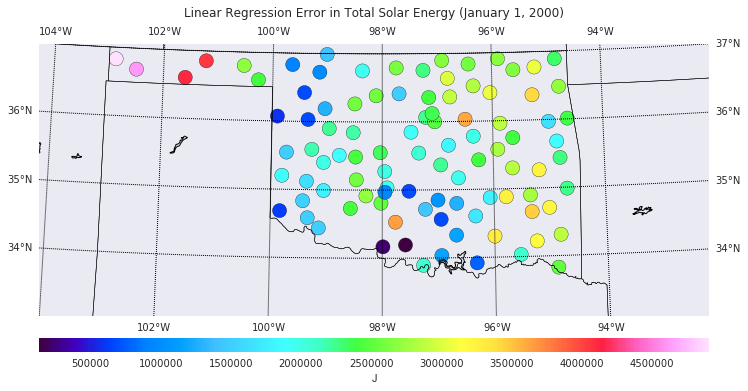

In [168]:
from mpl_toolkits.basemap import Basemap, cm
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

lllat=33; urlat=37; lllon=-104; urlon=-92
ax = axes
m = basic_oklahoma_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
parallels = np.arange(30.,40,1.)
m.drawparallels(parallels,labels=[1,1,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-104.,-92.,2.)
m.drawmeridians(meridians,labels=[0,0,1,1],fontsize=10)
data = error_list.tolist()[0]
lons = my_input[3]['lon']
lats = my_input[3]['lat']
x, y = m(lons.values, lats.values)

cs = m.scatter(x,y, s=200, c=data, cmap=cm.GMT_wysiwyg)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="8%")
cbar.set_label('J')
# add title
plt.title("Linear Regression Error in Total Solar Energy (January 1, 2000)", y=1.08)
plt.show()

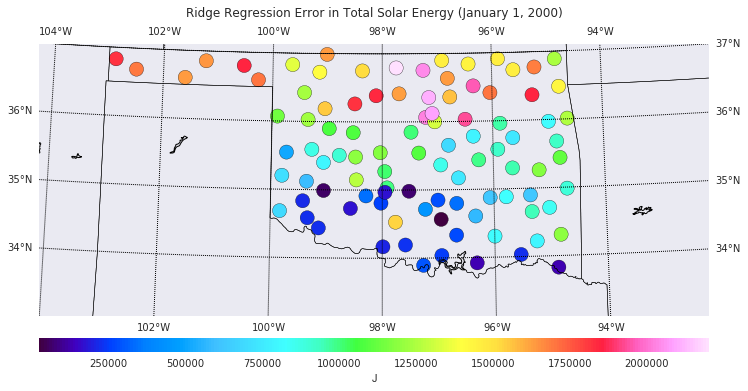

In [172]:
from mpl_toolkits.basemap import Basemap, cm
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

lllat=33; urlat=37; lllon=-104; urlon=-92
ax = axes
m = basic_oklahoma_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
parallels = np.arange(30.,40,1.)
m.drawparallels(parallels,labels=[1,1,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-104.,-92.,2.)
m.drawmeridians(meridians,labels=[0,0,1,1],fontsize=10)
data = ridge_list.tolist()[0]
lons = my_input[3]['lon']
lats = my_input[3]['lat']
x, y = m(lons.values, lats.values)

cs = m.scatter(x,y, s=200, c=data, cmap=cm.GMT_wysiwyg)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="8%")
cbar.set_label('J')
# add title
plt.title("Ridge Regression Error in Total Solar Energy (January 1, 2000)", y=1.08)
plt.show()

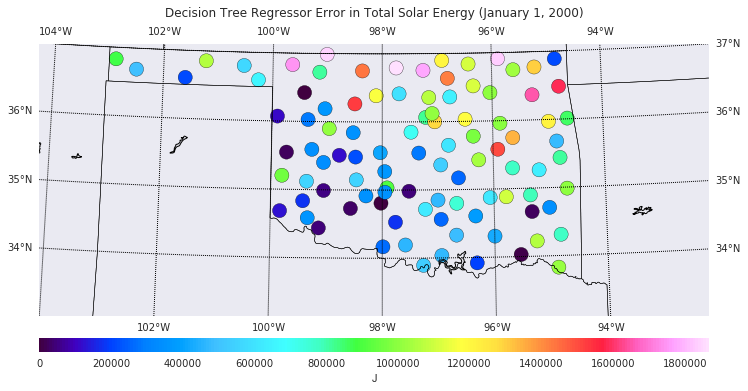

In [189]:
from mpl_toolkits.basemap import Basemap, cm
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

lllat=33; urlat=37; lllon=-104; urlon=-92
ax = axes
m = basic_oklahoma_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
parallels = np.arange(30.,40,1.)
m.drawparallels(parallels,labels=[1,1,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-104.,-92.,2.)
m.drawmeridians(meridians,labels=[0,0,1,1],fontsize=10)
data = dt_list.tolist()[0]
lons = my_input[3]['lon']
lats = my_input[3]['lat']
x, y = m(lons.values, lats.values)

cs = m.scatter(x,y, s=200, c=data, cmap=cm.GMT_wysiwyg)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="8%")
cbar.set_label('J')
# add title
plt.title("Decision Tree Regressor Error in Total Solar Energy (January 1, 2000)", y=1.08)
plt.show()

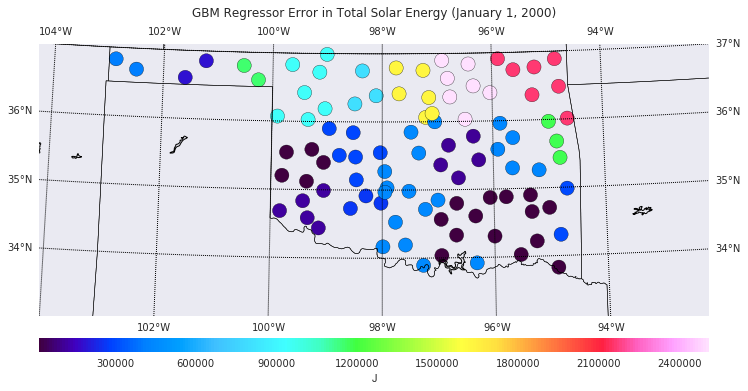

In [190]:
from mpl_toolkits.basemap import Basemap, cm
%matplotlib inline
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12,10))
fig.subplots_adjust(hspace=0.05, wspace=0.05)

lllat=33; urlat=37; lllon=-104; urlon=-92
ax = axes
m = basic_oklahoma_map(ax, lllat=lllat, urlat=urlat, lllon=lllon, urlon=urlon)
parallels = np.arange(30.,40,1.)
m.drawparallels(parallels,labels=[1,1,0,0],fontsize=10)
# draw meridians
meridians = np.arange(-104.,-92.,2.)
m.drawmeridians(meridians,labels=[0,0,1,1],fontsize=10)
data = gbm_list.tolist()[0]
lons = my_input[3]['lon']
lats = my_input[3]['lat']
x, y = m(lons.values, lats.values)

cs = m.scatter(x,y, s=200, c=data, cmap=cm.GMT_wysiwyg)
# add colorbar.
cbar = m.colorbar(cs,location='bottom',pad="8%")
cbar.set_label('J')
# add title
plt.title("GBM Regressor Error in Total Solar Energy (January 1, 2000)", y=1.08)
plt.show()

<center><h4>Mean Absolute Error (1/1/2000 -  6/30/2000)</h4></center>

<table style="width: 300px;" border="0" align="center">
<tbody>
<tr>
<td>Method</td>
<td>Error</td>
</tr>
<tr>
<td>Average Value Over Each Station</td>
<td>6.6M</td>
</tr>
<tr>
<td>Linear Regression</td>
<td>3.3M</td>
</tr>
<tr>
<td>Ridge Regression</td>
<td>2.8M</td>
</tr>
<tr>
<td>Decision Tree</td>
<td>3.6M</td>
</tr>
</tbody>
</table>

<img src=images/lin_error.png width="900"> </img>

<img src=images/ridge_error.png width="900"> </img>

<img src=images/dt_error.png width="900"> </img>

<img src=images/gbm_error.png width="900"> </img>

## Variable Importance

<table style="width: 900px;" border="0" align="center">
<tbody>
<tr>
<td>Rank</td>
<td>Variable</td>
<td>Description</td>
<td>Time (UTC-6:00)/(UTC-5:00, DST)</td>
<td>Location</td>
<td>Model</td>
</tr>
<tr>
<td>1</td>
<td>dswrf_sfc</td>
<td>Downward short-wave radiative flux average at the surface</td>
<td>21:00</td>
<td>SW</td>
<td>1</td>
</tr>
<tr>
<td>2</td>
<td>dswrf_sfc</td>
<td>Downward short-wave radiative flux average at the surface</td>
<td>24:00</td>
<td>NW</td>
<td>0</td>
</tr>
<tr>
<td>3</td>
<td>stat_ketc</td>
<td>Is the station KETC?</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
</tr>
<tr>
<td>4</td>
<td>days_from_solstice</td>
<td>Number of days from the shortest day of the year</td>
<td>NA</td>
<td>NA</td>
<td>NA</td>
</tr>
<tr>
<td>5</td>
<td>dswrf_sfc</td>
<td>Downward short-wave radiative flux average at the surface</td>
<td>21:00</td>
<td>NW</td>
<td>0</td>
</tr>
<tr>
<td>6</td>
<td>tcolc_eatm</td>
<td>Total column-integrated condensate over the entire atmos.</td>
<td>21:00</td>
<td>SW</td>
<td>0</td>
</tr>
<tr>
<td>7</td>
<td>ulwrf_tatm</td>
<td>Upward long-wave radiation at the top of the atmosphere</td>
<td>24:00</td>
<td>NW</td>
<td>0</td>
</tr>
<tr>
<td>8</td>
<td>dswrf_sfc</td>
<td>Downward short-wave radiative flux average at the surface</td>
<td>18:00</td>
<td>SW</td>
<td>0</td>
</tr>
<tr>
<td>9</td>
<td>spfh_2m</td>
<td>Specific Humidity at 2 m above ground</td>
<td>12:00</td>
<td>SW</td>
<td>1</td>
</tr>
<tr>
<td>10</td>
<td>dswrf_sfc</td>
<td>Downward short-wave radiative flux average at the surface</td>
<td>21:00</td>
<td>SE</td>
<td>1</td>
</tr>
</tbody>
</table>

In [81]:
pd.DataFrame(corr_data.corr().ix[:,['dswrf_sfc', 'ulwrf_tatm', 'tcolc_eatm', 'total_solar']])

,dswrf_sfc,ulwrf_tatm,tcolc_eatm,total_solar
dswrf_sfc,1.000000,0.609336,-0.404502,0.786436
dlwrf_sfc,0.275821,0.042220,0.267159,0.072633
uswrf_sfc,0.853867,0.568324,-0.438247,0.723475
ulwrf_sfc,0.683873,0.413187,-0.056352,0.494502
ulwrf_tatm,0.609336,1.000000,-0.566786,0.569132
pwat_eatm,0.205423,-0.068035,0.295510,-0.035836
tcdc_eatm,-0.404612,-0.566111,0.999866,-0.382592
apcp_sfc,-0.310501,-0.389774,0.566891,-0.278272
pres_msl,-0.334547,-0.250148,0.012343,-0.197308
spfh_2m,0.412424,0.169216,0.129966,0.169196


In [87]:
import seaborn as sns


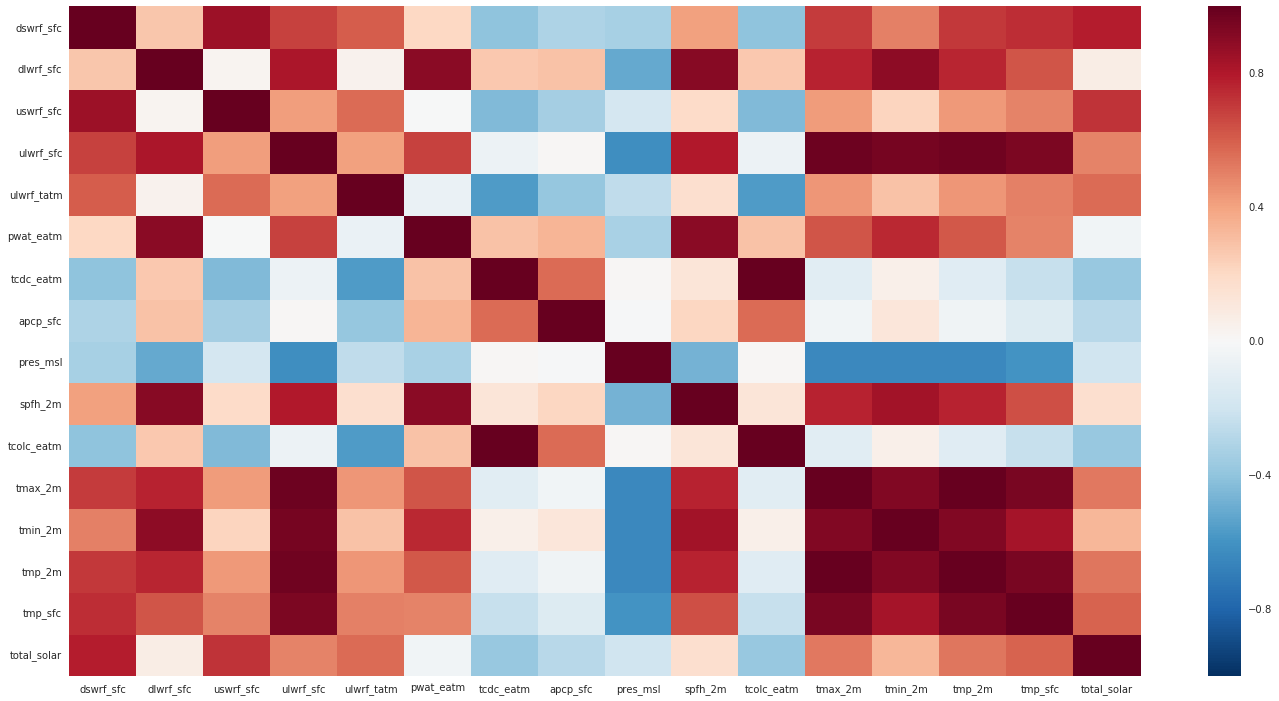

In [90]:
plt.figure(figsize=(24, 12))
sns.heatmap(corr_data.corr())

In [18]:
import cPickle as pickle
model = pickle.load(open('../solar/data/kaggle_solar/model/model_2016-02-21-16-11-01.p','rb'))

IOError: [Errno 2] No such file or directory: '../solar/data/kaggle_solar/model/model_2016-02-21-16-11-01.p'

## Infrastructure

<img src=images/project_setup.png width="900"> </img>

<center><h2> Lessons Learned </h2></center>
<br>
<ul>
<li>Logging-- worth careful consideration about what to include</li>
<li>Testing-- easy to throw notebook checks into a function</li>
<li>Size-- memory limits are easy to hit; design from the start for big data; single pickle file will not scale</li>
<li>Evaluation-- gained considerable insight on project over past three days; fun to push bigger, faster models, but it is worthwhile to spend some time reflecting on design</li>
<li>Kaggle-- winning models in this competition used very little feature engineering and focused on sophisticated modeling methodologies</li>
</ul>

<center><h2> Ideas for Improvement </h2></center>
<br>
<ul>
<li>Ramp up AWS use and overhaul design to make use of Apache Spark</li>
<li>Examine more sophisticated data access and storage methods</li>
<li>Focus automation efforts on testing and tuning of models and hyperparameters</li>
<li>Visualize the comparative performance of various models more thoroughly</li>
<li>Revisit exploratory analysis to identify patterns that lead to poor model performance</li>
<li>Build out more rigorous testing scripts</li>
</ul>